In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [106]:
# set the filepath and load in a shapefile
fp = "dataset\\geo-data\\barrios\\barrios_badata.shp"

map_df = gpd.read_file(fp)

               BARRIO  COMUNA     PERIMETRO          AREA  OBJETO  \
0           CHACARITA    15.0   7724.852955  3.115707e+06  BARRIO   
1            PATERNAL    15.0   7087.513295  2.229829e+06  BARRIO   
2        VILLA CRESPO    15.0   8131.857075  3.615978e+06  BARRIO   
3    VILLA DEL PARQUE    11.0   7705.389797  3.399596e+06  BARRIO   
4             ALMAGRO     5.0   8537.901368  4.050752e+06  BARRIO   
5           CABALLITO     6.0  10990.964471  6.851029e+06  BARRIO   
6    VILLA SANTA RITA    11.0   5757.752335  2.153691e+06  BARRIO   
7        MONTE CASTRO    10.0   7361.036418  2.627481e+06  BARRIO   
8          VILLA REAL    10.0   5070.965652  1.334146e+06  BARRIO   
9              FLORES     7.0  15772.439510  8.590784e+06  BARRIO   
10           FLORESTA    10.0   7519.654092  2.320641e+06  BARRIO   
11       CONSTITUCION     1.0   6326.841375  2.101995e+06  BARRIO   
12      SAN CRISTOBAL     3.0   5987.226479  2.043711e+06  BARRIO   
13              BOEDO     5.0   66

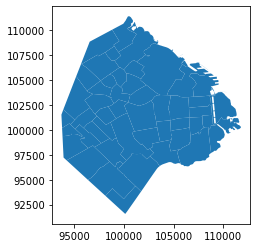

In [107]:
# debugging
map_df.plot()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(map_df)


In [108]:
# load in new csv file
df = pd.read_csv("obras.csv", header=0)
df = df.dropna()
df.head()

,Expediente,FechaRegistro,Calle,Numero,AlturaObra,Zona,Seccion,Manzana,Parcela,Barrio,Comuna,CodigoPostal,Tipo,MetrosCuadrados,Longitud,Latitud
0,34643512/18,2019-07-12,GUTENBERG,3023.0,3023/27,15,71.0,30,21,Agronomia,15,C1419IDI,Obra Mayor,121.33,-58.498100,-34.593488
1,26241573/18,2019-06-25,NAVARRO,2923.0,2923,15,71.0,42,29a,Agronomia,15,C1419HTE,Obra Media,520.85,-58.495350,-34.594327
3,32754162/18,2019-07-19,SANCHEZ DE LORIA,371.0,371/85,9,28.0,23,31,Almagro,5,C1173ACG,Obra Media,642.00,-58.413050,-34.613990
4,31134596/18,2019-08-30,"SALGUERO, JERONIMO",76.0,76/82,7,17.0,86,03A,Almagro,5,C1177ADB,Obra Mayor,6100.61,-58.420185,-34.610043
5,8756720/17,2019-08-26,DIAZ VELEZ AV.,4001.0,4001/09,7,17.0,67,26/27,Almagro,5,C1200AAH,Obra Menor,41.59,-58.423168,-34.608420


In [109]:
# select only the coluns that we want for the map
df = df[['Barrio','Comuna','Longitud','Latitud','MetrosCuadrados']]
df['Barrio'] = df['Barrio'].str.upper()
df_group_by_barrio = df.groupby(['Barrio'], as_index=False).sum()
print(df_group_by_barrio)

               Barrio  Comuna     Longitud      Latitud  MetrosCuadrados
0           AGRONOMIA      30  -116.993449   -69.187815           642.18
1             ALMAGRO      70  -817.887179  -484.490047         18801.10
2           BALVANERA      21  -408.832234  -242.259459         13887.59
3            BARRACAS      44  -642.174438  -381.093397          8439.32
4            BELGRANO     312 -1402.941552  -829.442272         65274.89
5                BOCA      28  -408.553088  -242.452513          5673.42
6               BOEDO      45  -525.781095  -311.682639          8448.33
7           CABALLITO     186 -1811.750162 -1073.182250         60077.26
8           CHACARITA     135  -526.050075  -311.270844         11999.75
9             COGHLAN      48  -233.896016  -138.243972         30845.60
10         COLEGIALES     182  -818.304429  -484.044225         11363.49
11       CONSTITUCION       3  -175.141921  -103.865462          2034.80
12             FLORES     189 -1578.536029  -934.91

In [110]:
# join the geodataframe with the cleaned up csv dataframe

merged = map_df.set_index('BARRIO').join(df_group_by_barrio.set_index('Barrio'))

print(merged)
print(merged['MetrosCuadrados'].max())

                   COMUNA     PERIMETRO          AREA  OBJETO  \
BARRIO                                                          
CHACARITA            15.0   7724.852955  3.115707e+06  BARRIO   
PATERNAL             15.0   7087.513295  2.229829e+06  BARRIO   
VILLA CRESPO         15.0   8131.857075  3.615978e+06  BARRIO   
VILLA DEL PARQUE     11.0   7705.389797  3.399596e+06  BARRIO   
ALMAGRO               5.0   8537.901368  4.050752e+06  BARRIO   
CABALLITO             6.0  10990.964471  6.851029e+06  BARRIO   
VILLA SANTA RITA     11.0   5757.752335  2.153691e+06  BARRIO   
MONTE CASTRO         10.0   7361.036418  2.627481e+06  BARRIO   
VILLA REAL           10.0   5070.965652  1.334146e+06  BARRIO   
FLORES                7.0  15772.439510  8.590784e+06  BARRIO   
FLORESTA             10.0   7519.654092  2.320641e+06  BARRIO   
CONSTITUCION          1.0   6326.841375  2.101995e+06  BARRIO   
SAN CRISTOBAL         3.0   5987.226479  2.043711e+06  BARRIO   
BOEDO                 5.0

90694.67


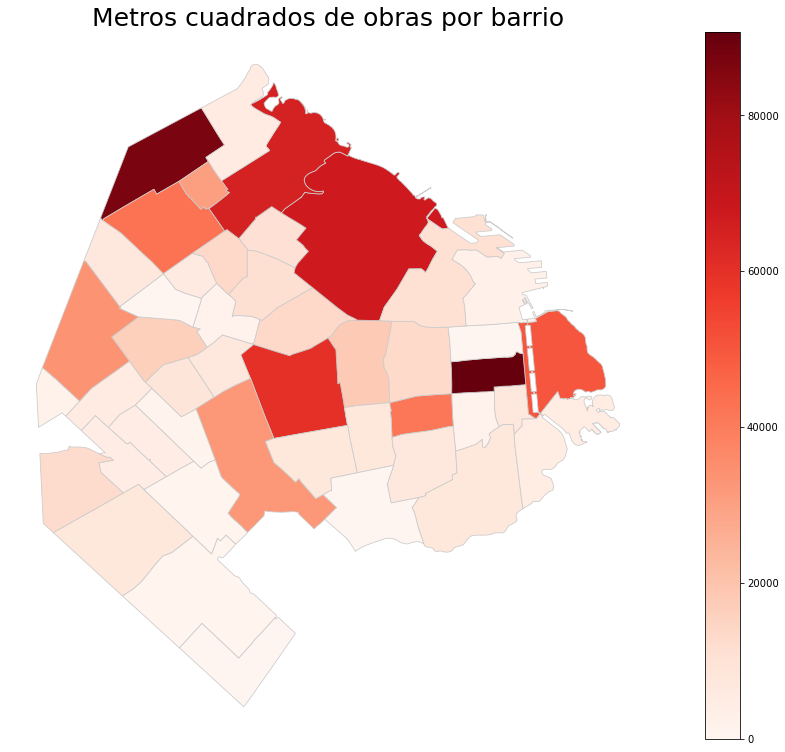

In [111]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'MetrosCuadrados'

vmin = 0
vmax = merged['MetrosCuadrados'].max()
print(vmax)

fig, ax = plt.subplots(1, figsize=(20, 13))

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Metros cuadrados de obras por barrio', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
